# Telco customer churn rates

## Goal:
- Discover factors that lead to a customer canceling their telecommunication service contract
- Predict if a customer will cancel their service contract (churn)

## Imports

In [1]:
# import libraries for working with arrays and DataFrames
import numpy as np
import pandas as pd
# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import statistics tools
from scipy import stats
# import machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# import machine learning metric tools
from sklearn.metrics import classification_report, confusion_matrix, recall_score,\
accuracy_score
# import functions for retrieving and cleaning telco dataset
import prepare as p
# import functions for exploration visualizations
import explore as e
# import functions for machine learning models
import modeling as m

opening data from file


## Acquire

* The dataset used in this project was acquired from the Codeup database
* The dataset was downloaded via SQL connection
* The original size of dataset was 7043 rows and 24 columns
* Each row represents one customer's contract with the telecom company
* Each column represents one aspect of a customer's contract

## Prepare

* We removed the 'payment_type_id', 'internet_service_type_id', 'contract_type_id' because they were redundant information
* The 'total_charges' column was converted from object data type to float type
* Columns with yes/no values were converted to 1/0
* Encoded categorical variables into dummies
* Columns were then renamed to remove spaces and parenthesis
* A column was created to identify customers without a subscription to either online security or online backup services
* Data was split into train, validate and test groups (56%, 24%, 20%), stratifying on the 'churn' column

In [2]:
# retrieve data from SQL server, and perform cleaning tasks
df = p.wrangle()
# split data for machine learning tasks
train, validate, test = p.split_data(df)

opening data from file


### A look at the data

In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,neither_security_or_backup
1843,2676-ISHSF,Male,0,0,0,1,1,No,No internet service,No internet service,...,1,0,0,0,0,1,0,0,1,False
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,1,0,0,0,1,0,0,False
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,0,1,0,1,1,0,1,0,0,False
5210,7328-OWMOM,Female,0,0,1,31,1,No,No internet service,No internet service,...,1,0,1,0,0,1,1,0,0,False
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,0,1,0,0,1,0,False


### A summary of the data

In [4]:
train.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,gender_male,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,...,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.153436,0.491250,0.304844,32.515851,0.902612,0.590921,64.215191,2270.874068,0.265280,0.501902,...,0.381689,0.224195,0.381943,0.211007,0.242455,0.431905,0.224195,0.215318,0.337053,0.233071
std,0.360453,0.499987,0.460400,24.542484,0.296523,0.491726,30.196023,2258.592385,0.441538,0.500060,...,0.485863,0.417104,0.485924,0.408075,0.428622,0.495404,0.417104,0.411095,0.472763,0.422841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.550000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,34.000000,385.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.150000,1386.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.600000,3809.375000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8672.450000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploration

### 1. How often do customers churn?

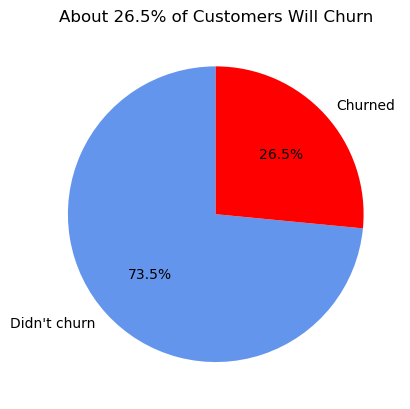

In [5]:
# get pie chart showing the total customer churn rate
e.get_pie_total()

- About 1/4 of customers (26.5%) will cancel their service contract (churn).

## 2. Do customers with one service type have a higher churn rate than customers who are subscribed to both phone and internet services?

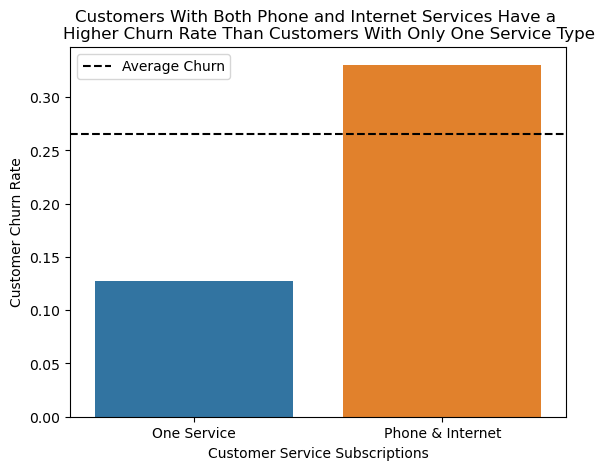

In [6]:
# retrieve a bar graph showing the churn rates of customers with one service
# type and customers with both service types
e.get_bar_phone_and_internet()

- Customers who have both phone and internet services churn at a rate around 20% higher than customers who have only one service type.

## 3. Do customers with neither online security or online backup services have a higher churn rate than customers with at least one service?

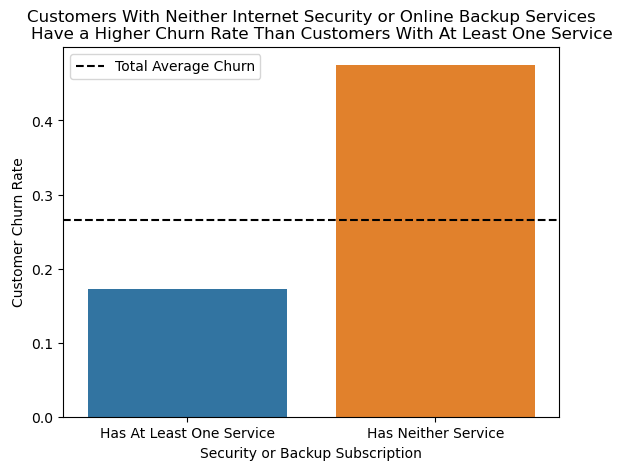

In [7]:
# retrieve a bar plot showing the churn rate of customers who do not have online security
# or online backup services, and customers who have at least one service
e.get_bar_security_or_backup()

### We will now verify the statistical significance of these results

- We will use a 95% confidence interval
- The resulting $\alpha$ value is: 0.05 
- We will use a 1-tailed, 1-sample t-test

#### H$_0$ : Customers without online security or online backup have a churn rate <= average churn rate of all customers 

#### H$_a$ : Customers without online security or online backup have a churn rate > average churn rate of all customers 

- Since we are looking at a 1-tailed t-test we will be looking for p / 2 < $\alpha$ and a t-stat that is > 0

In [8]:
# retrieve results of a chi-squared test
e.get_ttest_neither_security_or_backup()

T_stat is greater than 0: True, T_stat = 13.1502
p-value / 2 is less than alpha: True, p-value / 2 = 4.11937e-38


The p-value is less then our assigned alpha and the t_stat is greater than 0. Therefore we have evidence that customers who are not subscribed to either online security or online backup services have a higher churn rate than customers who are subscribed to at least one service. Based on the 21% difference in means, I believe that using the online security and online backup services fields durring modeling will have a moderate imporovement on the model's scores.

## 4. Do customers with tech support service have a lower churn rate than customers on average?

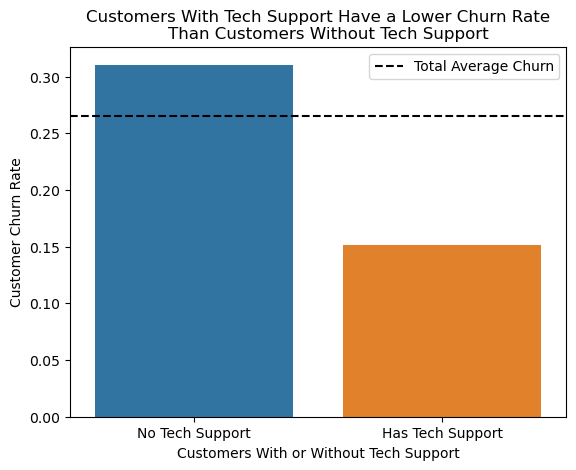

In [9]:
# retrieve a bar graph showing the difference in churn rate for customers who 
# are subscribed to tech support and customers who are not
e.get_bar_tech_support()

### We will now verify the statistical significance of these results
- We will use a 95% confidence interval
- The resulting 𝛼 value is: 0.05
- This will be a 1-tailed 1-sample t-test

#### H$_0$ : Customers with tech support have a churn rate >= average churn rate of all customers 

#### H$_a$ : Customers with tech support have a churn rate < average churn rate of all customers 

- Since we are looking at a 1-tailed t-test we will be looking for p / 2 < $\alpha$ and a t-stat that is < 0

In [10]:
# retrieve the t-test results
e.get_ttest_tech_support()

T_stat is less than 0: True, T_stat = -8.83338
p-value / 2 is less than alpha: True, p-value / 2 = 1.02531e-18


The p-value is less then our assigned alpha and the t_stat is less than 0. Therefore we have evidence that customers who are subscribed to tech support service have a lower churn rate than customers on average. Based on the 11% difference in means, I believe that using the tech support field durring modeling will have an imporovement on the model's scores.

## 5. Do customers with dependents have a lower churn rate than customers without dependents?

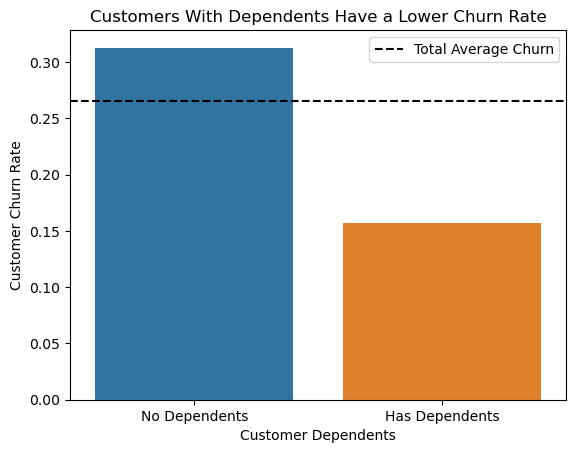

In [11]:
# retrieve a bar graph showing the difference in churn rate of customers
# who have dependents and customers without dependents
e.get_bar_dependents()

We can see from the graph that a customer with dependents is less likely to churn. There is a 10.8% difference in the churn rate of customers with dependents and customers without dependents, which indicates that the dependent field will be useful for durring modeling.

## Exploration Summary
* Having both phone and internet services increased the churn rate of customers.
* Customers without neither online security or online backup services had a higher churn rate than customers that have at least one service.
* Customers with tech support have a lower churn rate than customers without it
* Customers with dependents have a lower churn rate than customers without dependents

### Features that I will be using in modeling

- 'multiple_phone_lines' and 'internet_service_types' will be used
- 'online_security' and 'online_backup' will be used
- 'tech_support' and 'device_protection' will be used
- 'dependents' will be used
- 'payment_type' will be used
- 'contract_type' will be used

### Features that will not be used

- Total charges will not be used
- Monthly charges will not be used
- Gender will not be used

## Modeling

### Introduction
* We will be looking to identify customers who have a high churn probablity
* We will be looking at the Recall metric to identify as many customers that are about to churn as possible
* Our baseline prediction will be that a customer will not churn (churn = 0)

In [12]:
# create an array the same size as our training dataset with our baseline prediction
baseline = [0] * len(train)
print(f'The baseline prediction has {(train.churn == baseline).mean():.2%} accuracy')
print(f'The baseline prediction has {recall_score(train.churn, baseline):.2%} recall')

The baseline prediction has 73.47% accuracy
The baseline prediction has 0.00% recall


Since our baseline prediction is that a customer will never churn, its recall score is 0.00%

In [13]:
# prepare data for input into machine learning models
train_X, validate_X, test_X,\
train_y, validate_y, test_y \
= m.model_prep(train,validate,test)

### Decision Tree Model

In [14]:
# retrieve decision tree ML model
dt = m.get_decision_tree(train_X, validate_X, train_y, validate_y)

Decision Tree Model
Recall score on train: 65.97%
Recall score on validate: 57.02%


### Random Forest Model

In [15]:
# retrieve random forest ML model
rf = m.get_random_forest(train_X, validate_X, train_y, validate_y)

Random Forest Model
Recall score on train: 70.08%
Recall score on validate: 57.91%


### Logistic Regression Model

In [16]:
# retrieve logistic regression ML model
lr = m.get_logistic_regression(train_X, validate_X, train_y, validate_y)

Logistic Regression Model
Recall score on train: 68.83%
Recall score on validate: 56.12%


### Test Model
* We will use the Random Forest Classifier model for our test data
* The Random Forest model consistantly had the highest recall scores out of the models used

In [17]:
# get customer churn rate predicion using the random forest model on the test data
m.get_rf_test(test_X, test_y, rf)

Random Forest Model
Recall score on test: 55.61%


### Modeling Wrap 
* The Random Forest Classifier model had an accuracy score of between 76% to 83%, since the baseline accuracy was 76% the random forest model did perform slightly better than baseline in accuracy.
* However, we were concerned more with the recall score than the accuracy score, and since the baseline had a recall score of 0% the random forest model performed far better, with a recall score between 55.6% to 69%.
* We would recommend using the random forest model in predicting customer churn.

## Conclusion

### Summary
* We identified that services such as online security, online backup, device protection and tech support reduced customer churn rate.
* We were able to use the identified services to predict customer churn rate using a random forest classifier machine learning model.

### Recommendations
* Using the prediction model that we have created, we would recommend identifying customers who have high probability of churn, and offering them additional services at reduced rates with the hopes of preventing the customer from churning.

### Next Steps
* If given more time we would recommend segmenting the dataset into groups of customers who are only internet service customers, only phone customers, and customers who are subscribed to both internet and phone services. This is because there are many metrics in the dataset which are specific to each service, and as we identified, customers who are subscribed to both services have a higher rate of churn than customers with only one service type.